#**Pneumonia Capstone project**

##**PROBLEM STATEMENT**

###**DOMAIN**: *Health Care*

###**CONTEXT**:

Computer vision can be used in health care for identifying diseases. In Pneumonia detection we need to detect Inflammation of  the  lungs.  In  this  challenge,  you’re  required  to  build  an  algorithm  to  detect  a  visual  signal  for  pneumonia  in  medical images. Specifically, your algorithm needs to automatically locate lung opacities on chest radiographs.•DATA DESCRIPTION:- In the dataset, some of the features are labeled “Not Normal No Lung Opacity”. This extra third class indicates that while pneumonia was determined not to be present, there was nonetheless some type of abnormality on the image and oftentimes this finding may mimic the appearance of true pneumonia. Dicom original images: - Medical images are stored in a special format called DICOM files (*.dcm). They contain a combination of header metadata as well as underlying raw image arrays for pixel data. - Dataset has been attached along with this project. Please use the same for this capstone project.- Original  link  to  the  dataset  : https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/data[  for  your  reference only ]. You can refer to the details of the dat aset in the above link- Acknowledgements: https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/overview/acknowledgements.•PROJECT

###**OBJECTIVE**: Design a DL based algorithm for detecting pneumonia.

###**PROJECT TASK**: [Score: 100 points]
1.**Milestone 1**:[ Score: 40 points]

*  Input: Context and Dataset‣Process:
      *  Step 1: Import the data. [ 3 points ]
      *  Step 2: Map training and testing images to its classes. [ 4 points ]
      *  Step 3: Map training and testing images to its annotations. [ 4 points ]
      *  Step 4: Preprocessing and Visualisation of different classes [4 Points]
      *  Step 5: Display images with bounding box. [ 5 points ]
      *  Step 6: Design, train and test basic CNN models for classification. [ 10 points ]
      *  Step 7: Interim report [ 10 points ]
      *  Submission: Interim report, Jupyter Notebook with all the steps in Milestone-1
      
2. **Milestone 2**: [ Score: 60 points]

*  Input: Preprocessed output from Milestone-1

      *  Step 1: Fine tune the trained basic CNN models for classification. [ 5 points ]
      *  Step 2: Apply Transfer Learning model for classification [4 points]
      *  Step  3:  Design,  train  and  test  RCNN  &  its  hybrids  based  object  detection  models  to  impose  the  bounding  box  or mask over the area of interest. [ 8 points ]
      *  Step 4: Pickle the model for future prediction [ 3 Points]
      *  Step 5: Final Report [40 Points]
      *  Submission: Final report, Jupyter Notebook with all the steps in Milestone-1 and Milestone-2
      
3. **Milestone 3**: [ Optional ]

      *  Step 1: Design a clickable UI based interface which can allow the user to browse & input the image, output the class and the bounding box or mask [ highlight area of interest ] of the input image
      *  Submission: Final report, Jupyter Notebook with the addition of clickable UI based interface
      
####**References and hints:**

*  Please refer to the blog to understand the basics of object detection: https://www.mygreatlearning.com/blog/object-detection-using-tensorflow/ *  YOLO object detection using OpenCV: https://www.mygreatlearning.com/blog/yolo-object-detection-using-opencv/?highlight=detection‣Classification and object detection: https://www.mygreatlearning.com/blog/cnn-model-architectures-and-applications/‣To make GUI as a desk app you   can use TKINTER library. You are free to use any other library.  
*  To make web service GUI you can use FLASK or DJANGO library.




## Milestone 1

# Loading the dataset

In [ ]:
#connect to google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing the necessary Libraries

In [ ]:
#Reading the training images from the path and labelling them into the given categories
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 # this is an important module to get imported which may even cause issues while reading the data if not used
import seaborn as sns # for data visualization
import tensorflow as tf
import keras
import os
from tensorflow.keras.models import Sequential #sequential api for sequential model
from tensorflow.keras.layers import Dense, Dropout, Flatten #importing different layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU,Activation
from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical #to perform one-hot encoding
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam,SGD #optimiers for optimizing the model
from tensorflow.keras.callbacks import EarlyStopping  #regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import losses, optimizers
from google.colab.patches import cv2_imshow
from tensorflow.keras.preprocessing import image

# Exploratory Data Analysis

### Reading the labels from CSV files

In [ ]:
# Reading the labels from CSV files
# Assuming the shared file path is correct and accessible
data = pd.read_csv('/content/drive/MyDrive/Capstone Project/stage_2_detailed_class_info.csv')
data.head()

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity


In [ ]:
labels = pd.read_csv("/content/drive/MyDrive/Capstone Project/stage_2_train_labels.csv")
class_info = pd.read_csv("/content/drive/MyDrive/Capstone Project/stage_2_detailed_class_info.csv")

df = pd.merge(labels, class_info, on="patientId", how="left")
df.sample(10)

,patientId,x,y,width,height,Target,class
21770,a8098820-9876-4866-91b5-6ee9f91d106d,561.0,397.0,211.0,292.0,1,Lung Opacity
21411,a5b48ab2-4a09-466e-a3e3-ec32023f49d5,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
24226,b402b80c-0be4-4c25-80be-d9ace219c83b,164.0,168.0,305.0,541.0,1,Lung Opacity
13636,729f2aa0-9564-4228-b516-1d8d4be8bb55,574.0,845.0,165.0,110.0,1,Lung Opacity
804,08d0531a-b5c3-4677-94f1-a48101ed3e06,NaN,NaN,NaN,NaN,0,Normal
10536,5ca656f2-49b6-43d5-ade6-5be4d795b06d,NaN,NaN,NaN,NaN,0,Normal
29787,d471c394-f44a-47a4-9e41-6a651b8916cc,193.0,210.0,217.0,447.0,1,Lung Opacity
11456,63a3624b-b2be-4681-87fb-e545315a4a0f,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
21993,a96bb268-a6b1-4dcb-a7f7-eeb51527e72f,721.0,357.0,247.0,414.0,1,Lung Opacity
31701,e30935ce-5d14-410f-bead-9ed974d5090b,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal


In [ ]:
print("NaN rows:", df['class'].isna().sum())

NaN rows: 0


Total Images: 26684
Total Rows: 37629


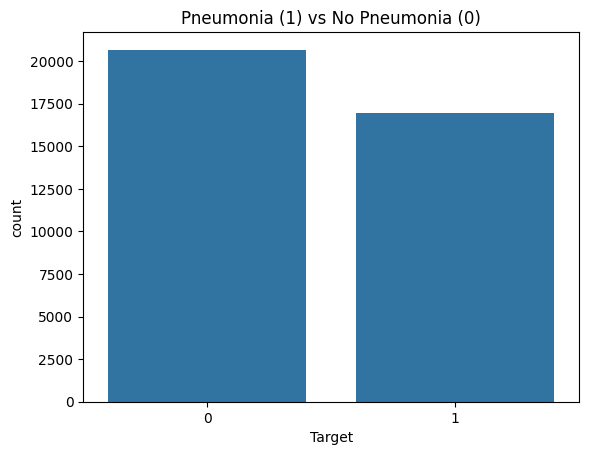

Patients with Pneumonia: 6012
Patients without Pneumonia: 20672


In [ ]:
print("Total Images:", df['patientId'].nunique())
print("Total Rows:", df.shape[0])
# Plot target distribution
sns.countplot(data=df, x='Target', palette='Set2')
plt.title('Pneumonia (1) vs No Pneumonia (0)')
plt.show()
# Unique patientId per class
print("Patients with Pneumonia:", df[df['Target']==1]['patientId'].nunique())
print("Patients without Pneumonia:", df[df['Target']==0]['patientId'].nunique())

Above analysis shows arounr 6012 patients are detected with Pneumonia and 20672 patients are detected without Pneumonia

In [ ]:
# Milestone 1, Step 2: Map training and testing images to its classes

print("### Milestone 1, Step 2: Mapping Images to Classes ###\n")

# Create a consolidated DataFrame with one row per patient and their final class
patient_to_class = labels.groupby('patientId')['Target'].max().reset_index()
patient_to_class['class'] = patient_to_class['Target'].apply(lambda x: 'Lung Opacity' if x == 1 else 'Normal/Not Normal/No Lung Opacity')


print("--- Sample of Patient-to-Class Mapping ---")
print(patient_to_class.head())
print("\n--- Class Distribution from Mapping ---")
print(patient_to_class['class'].value_counts())

### Milestone 1, Step 2: Mapping Images to Classes ###

--- Sample of Patient-to-Class Mapping ---
                              patientId  Target  \
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6       0   
1  000924cf-0f8d-42bd-9158-1af53881a557       0   
2  000db696-cf54-4385-b10b-6b16fbb3f985       1   
3  000fe35a-2649-43d4-b027-e67796d412e0       1   
4  001031d9-f904-4a23-b3e5-2c088acd19c6       1   

                               class  
0  Normal/Not Normal/No Lung Opacity  
1  Normal/Not Normal/No Lung Opacity  
2                       Lung Opacity  
3                       Lung Opacity  
4                       Lung Opacity  

--- Class Distribution from Mapping ---
class
Normal/Not Normal/No Lung Opacity    20672
Lung Opacity                          6012
Name: count, dtype: int64


In [ ]:
# --- Step 3: Map training and testing images to its annotations ---

print("\\n### Milestone 1, Step 3: Mapping Images to Annotations ###\\n")

# Filter the DataFrame to only include rows where pneumonia was detected (Target == 1)
# These rows contain the bounding box annotations.
annotations_df = labels[labels['Target'] == 1].copy()

# The columns 'x', 'y', 'width', 'height' already represent the annotations.
# We can select these columns for clarity.
annotations_df = annotations_df[['patientId', 'x', 'y', 'width', 'height']]

print("--- Sample of Patient-to-Annotation Mapping ---")
# Display the first few rows of the annotations mapping
print(annotations_df.head())

print(f"\\nTotal number of bounding box annotations found: {len(annotations_df)}")

\n### Milestone 1, Step 3: Mapping Images to Annotations ###\n
--- Sample of Patient-to-Annotation Mapping ---
                               patientId      x      y  width  height
4   00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0
5   00436515-870c-4b36-a041-de91049b9ab4  562.0  152.0  256.0   453.0
8   00704310-78a8-4b38-8475-49f4573b2dbb  323.0  577.0  160.0   104.0
9   00704310-78a8-4b38-8475-49f4573b2dbb  695.0  575.0  162.0   137.0
14  00aecb01-a116-45a2-956c-08d2fa55433f  288.0  322.0   94.0   135.0
\nTotal number of bounding box annotations found: 9555


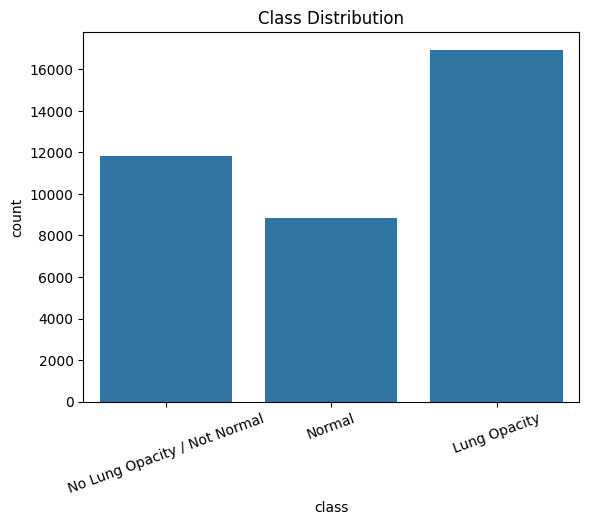

In [ ]:
sns.countplot(data=df, x='class')
plt.title('Class Distribution')
plt.xticks(rotation=20)
plt.show()

Above plot shows the distribution of the Lung opacity categories with Normal, Not Normal, Lung Opacity

In [ ]:
# Filter the DataFrame to include only rows where the 'Target' column is equal to 1
df_target_1 = df[df['Target'] == 1]

# Select the columns 'x', 'y', 'width', and 'height' from the filtered DataFrame
bbox_data = df_target_1[['x', 'y', 'width', 'height']]

# Calculate and print descriptive statistics
print("Descriptive statistics for bounding box parameters (Target=1):")
display(bbox_data.describe())

Descriptive statistics for bounding box parameters (Target=1):


,x,y,width,height
count,16957.000000,16957.000000,16957.000000,16957.000000
mean,398.980008,360.443121,219.266675,337.799552
std,204.869392,149.202409,59.195268,158.986899
min,2.000000,2.000000,40.000000,45.000000
25%,209.000000,243.000000,178.000000,210.000000
50%,343.000000,355.000000,218.000000,309.000000
75%,596.000000,472.000000,259.000000,452.000000
max,835.000000,881.000000,528.000000,942.000000


## Visualize bounding box features

### Subtask:
Create visualizations (histograms, box plots) to understand the spread and typical values of the bounding box features.


**Reasoning**:
Create histograms and box plots for the bounding box features to visualize their distributions and identify outliers.



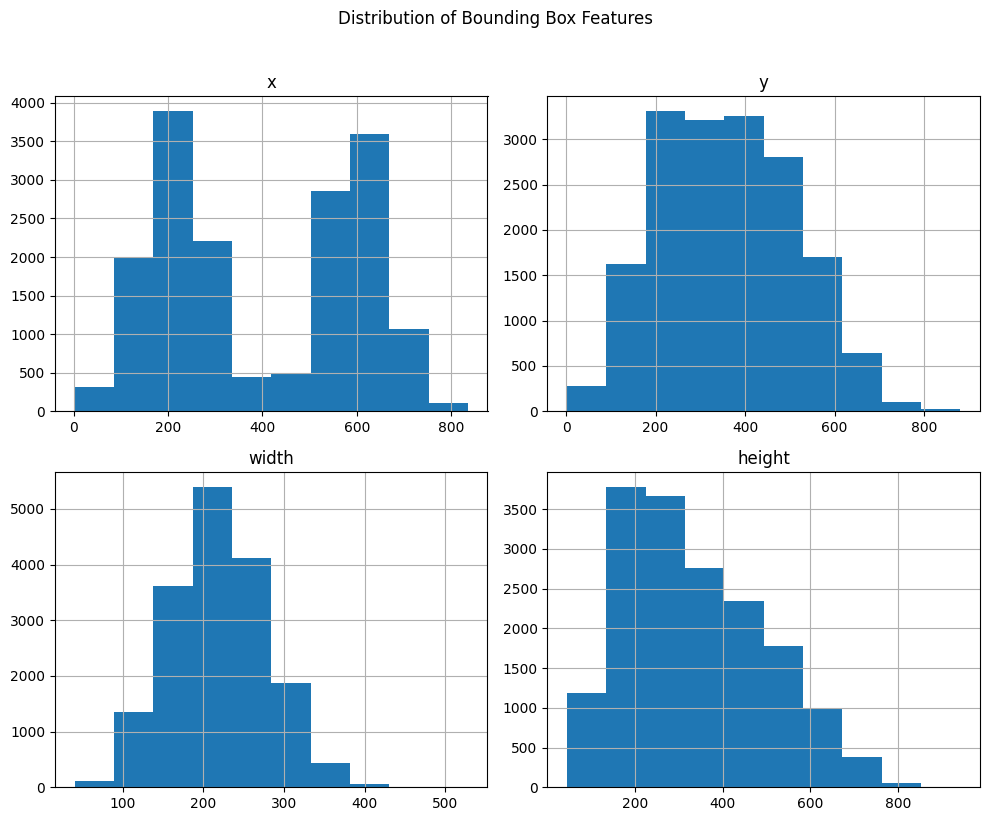

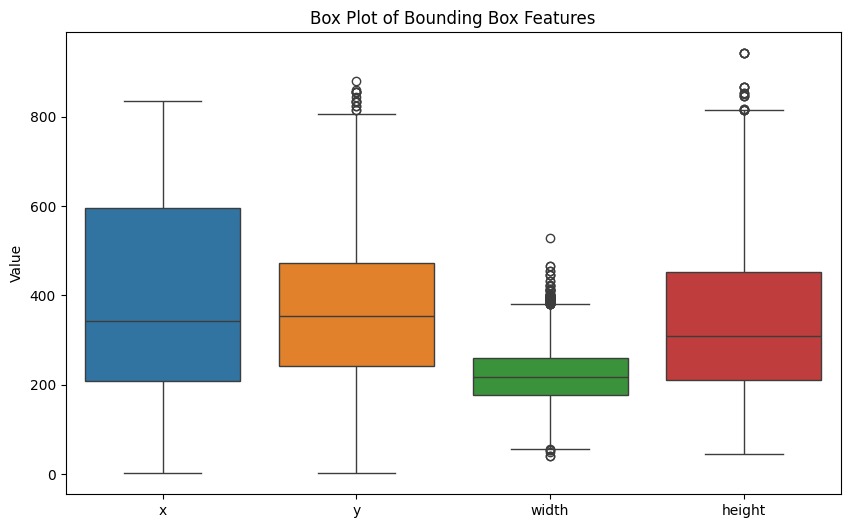

In [ ]:
# Create histograms for the bounding box features
bbox_data.hist(figsize=(10, 8))
plt.suptitle('Distribution of Bounding Box Features', y=1.02)
plt.tight_layout()
plt.show()

# Create box plots for the bounding box features
plt.figure(figsize=(10, 6))
sns.boxplot(data=bbox_data)
plt.title('Box Plot of Bounding Box Features')
plt.ylabel('Value')
plt.show()

## Analyze relationship between bounding box features and target

### Subtask:
Investigate if there are any noticeable patterns or relationships between the bounding box dimensions and the `Target` variable.


**Reasoning**:
Group the DataFrame by 'Target' and calculate the mean of the bounding box features for each group, then print the result.



In [ ]:
# Group the DataFrame by the 'Target' column and calculate the mean of the bounding box features
mean_bbox_by_target = df.groupby('Target')[['x', 'y', 'width', 'height']].mean()

# Print the resulting grouped data
print("Mean bounding box dimensions by Target:")
display(mean_bbox_by_target)

Mean bounding box dimensions by Target:


,x,y,width,height
Target,,,,
0,NaN,NaN,NaN,NaN
1,398.980008,360.443121,219.266675,337.799552


# Summary of Exploratory Data Analysis:

1. Descriptive Statistics of Bounding Box Features (Target=1):
Based on the descriptive statistics, for images with 'Target' equal to 1, the bounding boxes have an average x-coordinate of around 398.98, an average y-coordinate of around 360.44, an average width of around 219.27, and an average height of around 337.80.
The standard deviations indicate the variability in these dimensions.

2. Distributions of Bounding Box Features:
The histograms show the frequency distribution of x, y, width, and height.
The box plots visualize the spread of the data and highlight potential outliers.
The distributions appear to be somewhat skewed for some features, and there are noticeable outliers in the box plots, particularly for height and width.

3. Relationship between Bounding Box Features and Target:
The analysis clearly shows that bounding box data is primarily associated with images where 'Target' is 1 (pneumonia).
Images with 'Target' 0 (no pneumonia) do not have bounding box information, resulting in NaN values for bounding box features in those cases.
The mean bounding box dimensions for 'Target' 1 are approximately: x=398.98, y=360.44, width=219.27, height=337.80.

Concise Summary of EDA:
The exploratory data analysis revealed that bounding box information is exclusively present for images diagnosed with pneumonia (Target=1).
For these cases, the bounding boxes show variability in their position and size, with average dimensions indicating a typical region of interest for pneumonia.
Visualizations highlighted the distributions and presence of outliers in the bounding box parameters.

## Summary:

### Data Analysis Key Findings

*   For images with `Target` equal to 1 (pneumonia cases), there are 16957 bounding box entries.
*   The average bounding box for `Target=1` images is centered around an x-coordinate of approximately 398.98 and a y-coordinate of approximately 360.44.
*   The average width of bounding boxes for `Target=1` images is about 219.27, and the average height is about 337.80.
*   Bounding box data is primarily associated with images where `Target` is 1 (pneumonia). Images with `Target` 0 (no pneumonia) do not have bounding box information, resulting in `NaN` values for bounding box features in those cases.
*   Visualizations (histograms and box plots) show the frequency distribution and spread of the bounding box features. The distributions appear somewhat skewed for some features, and there are noticeable outliers in the box plots, particularly for height and width.

### Insights or Next Steps

*   The strong association of bounding boxes with `Target=1` indicates that bounding boxes likely delineate the regions of interest (pneumonia) within the images.
*   Investigating the nature and impact of the outliers in bounding box dimensions, especially height and width, could be a valuable next step for potential data cleaning or preprocessing before model training.


In [ ]:
!pip install pydicom


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 34.1 MB/s eta 0:00:00


In [ ]:
import pydicom

In [ ]:
# 1. Specify the path to your zip file
zip_file_path = '/content/drive/MyDrive/Capstone Project/stage_2_train_images.zip'

# 2. Specify the directory to extract the contents
extract_dir = '/content/drive/MyDrive/Capstone Project/stage_2_train_images'

# 3. Set the expected number of files after extraction
expected_file_count = 26684

# --- Conditional Unzipping Logic ---
# Check if the extraction directory already exists and has enough files
if os.path.isdir(extract_dir) and len(os.listdir(extract_dir)) >= expected_file_count:
    print(f"Directory '{extract_dir}' already exists and contains {len(os.listdir(extract_dir))} files.")
    print("Skipping the unzip process. ✅")

else:
    print(f"Directory '{extract_dir}' not found or is incomplete.")
    print(f"Starting to unzip {zip_file_path}...")

    # Create the extraction directory if it doesn't exist
    os.makedirs(extract_dir, exist_ok=True)

    # Unzip the file using the '-q' (quiet) and '-n' (never overwrite) flags
    !unzip -q -n "{zip_file_path}" -d "{extract_dir}"

    print("Unzipping complete. 🎉")

# --- Verification ---
# Finally, verify the contents of the directory
try:
    num_files = len(os.listdir(extract_dir))
    print(f"\\nSuccessfully verified {num_files} files and folders in:")
    print(extract_dir)
except Exception as e:
    print(f"An error occurred during verification: {e}")


# Read the contents of the unzipped folder
unzipped_contents = os.listdir(extract_dir)

# Print the contents
print("Contents of the unzipped folder:")
print(unzipped_contents)

Directory '/content/drive/MyDrive/Capstone Project/stage_2_train_images' not found or is incomplete.
Starting to unzip /content/drive/MyDrive/Capstone Project/stage_2_train_images.zip...
Unzipping complete. 🎉
\nSuccessfully verified 2 files and folders in:
/content/drive/MyDrive/Capstone Project/stage_2_train_images
Contents of the unzipped folder:
['stage_2_train_images', '__MACOSX']


In [ ]:
import pydicom
import matplotlib.pyplot as plt
import matplotlib.patches as patches # import patches
import os # Import the os module

def show_dicom_image(patient_id, bbox=False):
   # Construct the correct path to the DICOM file including the subdirectory
   dicom_path = f"/content/drive/MyDrive/Capstone Project/stage2_train_images/stage_2_train_images/{patient_id}.dcm" # Corrected path

   # Check if the file exists before attempting to read it
   if not os.path.exists(dicom_path):
       print(f"Error: DICOM file not found at {dicom_path}")
       return

   try:
       ds = pydicom.dcmread(dicom_path)
       fig, ax = plt.subplots(1, 1, figsize=(8, 8))
       ax.imshow(ds.pixel_array, cmap='gray')
       if bbox:
           records = df[df['patientId'] == patient_id]
           for _, row in records.iterrows():
               if row['Target'] == 1:
                   rect = patches.Rectangle(
                       (row['x'], row['y']), row['width'], row['height'],
                       linewidth=2, edgecolor='red', facecolor='none'
                   )
                   ax.add_patch(rect)
       plt.title(patient_id)
       plt.show()
   except Exception as e:
       print(f"Error reading DICOM file {patient_id}.dcm: {e}")

## Identify dicom files

### Subtask:
Locate all the DICOM files within the specified directory (likely the `stage_2_test_images` subdirectory).


**Reasoning**:
Construct the full path to the directory containing the DICOM images, list the files in that directory, and filter for files with a '.dcm' extension.



In [ ]:
# Construct the full path to the directory containing the DICOM images
dicom_image_dir_name = [item for item in unzipped_contents if os.path.isdir(os.path.join(extract_dir, item)) and item != '__MACOSX'][0]
dicom_image_dir_path = os.path.join(extract_dir, dicom_image_dir_name)

# List all files within this image directory
all_files_in_dicom_dir = os.listdir(dicom_image_dir_path)

# Filter for files with a .dcm extension (case-insensitive)
dicom_files = [f for f in all_files_in_dicom_dir if f.lower().endswith('.dcm')]

# Print the number of DICOM files found and the first few file names
print(f"Found {len(dicom_files)} DICOM files.")
print("First 10 DICOM files:")
print(dicom_files[:10])

Found 26684 DICOM files.
First 10 DICOM files:
['f78584ca-15f7-45e6-abb5-a2493fb9e05a.dcm', 'f7aaf2ce-cceb-49f8-b62d-fe2a31665718.dcm', 'f79478cf-4446-49c7-904e-96ffff565a34.dcm', 'f79e5a75-5e15-431a-9ba3-de64c1724b65.dcm', 'f743c21e-5876-460b-bbd6-2e2dcca41baa.dcm', 'f7d0e9c2-68d8-4742-9ce6-1ac3d250cb35.dcm', 'f7742dff-46c8-4431-b6b2-d7cc9033f071.dcm', 'f7a42b73-f909-4e1f-89dd-c776f45cdc40.dcm', 'f6b1cd9b-dce3-498d-8041-4cbb66a77d14.dcm', 'f7bf7dd9-76af-4fbe-bfc7-a524691da76b.dcm']


In [ ]:
import os

# Specify the directory to extract the contents (same as in the unzip cell)
extract_dir = '/content/drive/MyDrive/Capstone Project/stage_2_train_images' # Corrected extract_dir

# Read the contents of the unzipped folder
# Assuming the images are directly in the extract_dir based on the unzip output
unzipped_contents_full_path = extract_dir

if os.path.exists(unzipped_contents_full_path):
    unzipped_files = os.listdir(unzipped_contents_full_path)

    # Print the number of files found and the first few file names
    print(f"Found {len(unzipped_files)} files in the unzipped directory.")
    print("First 10 files in the unzipped directory:")
    print(unzipped_files[:10])
else:
    print(f"The directory {unzipped_contents_full_path} was not found.")

Found 2 files in the unzipped directory.
First 10 files in the unzipped directory:
['stage_2_train_images', '__MACOSX']


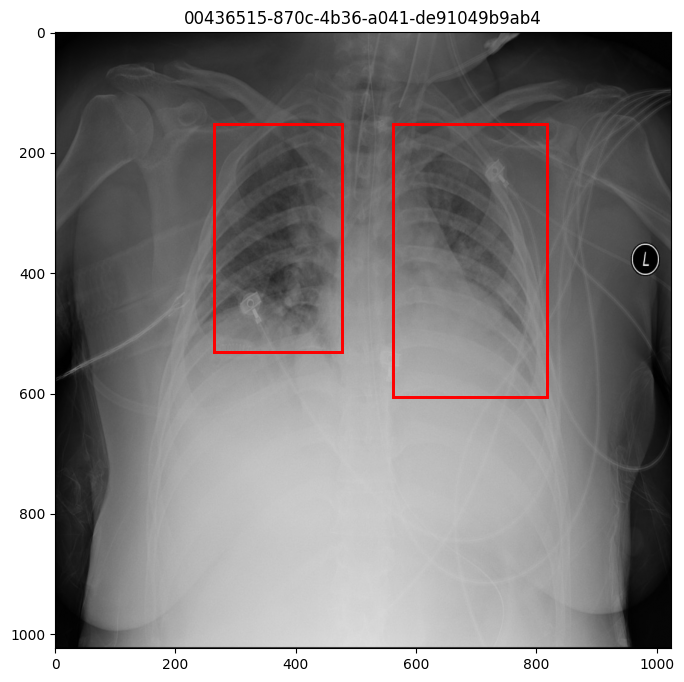

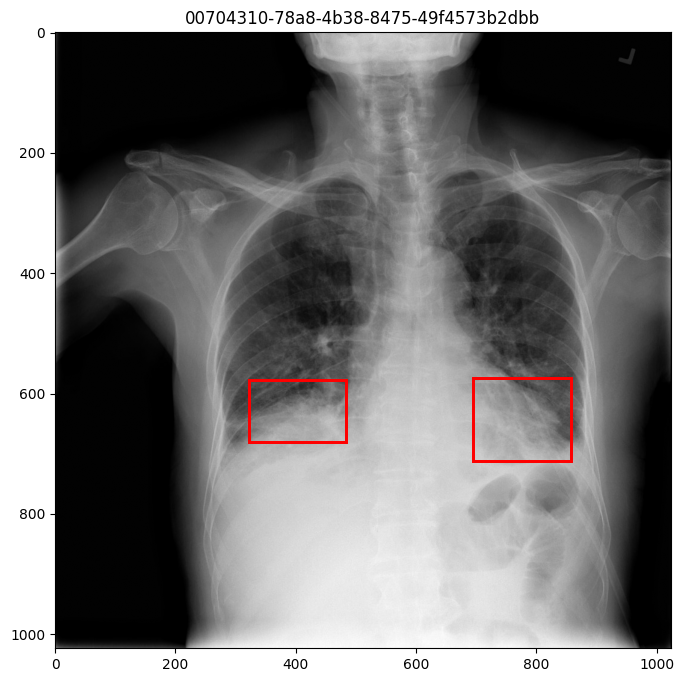

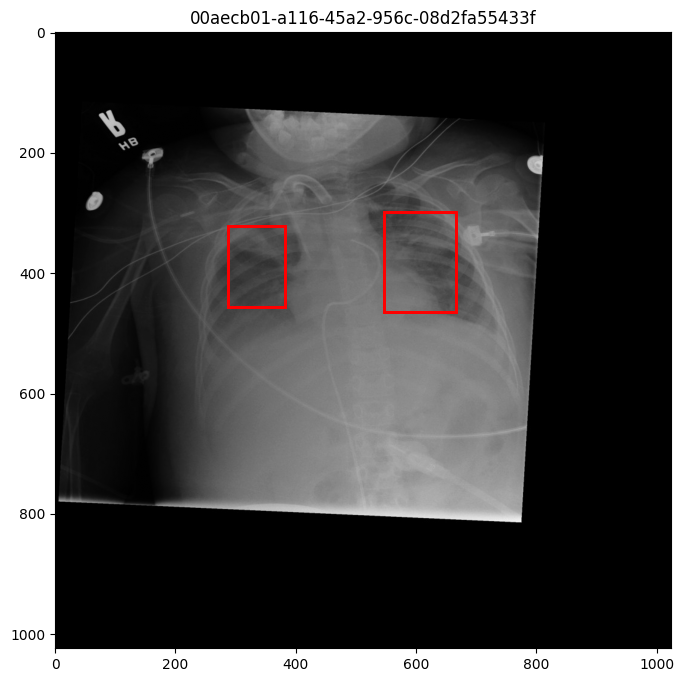

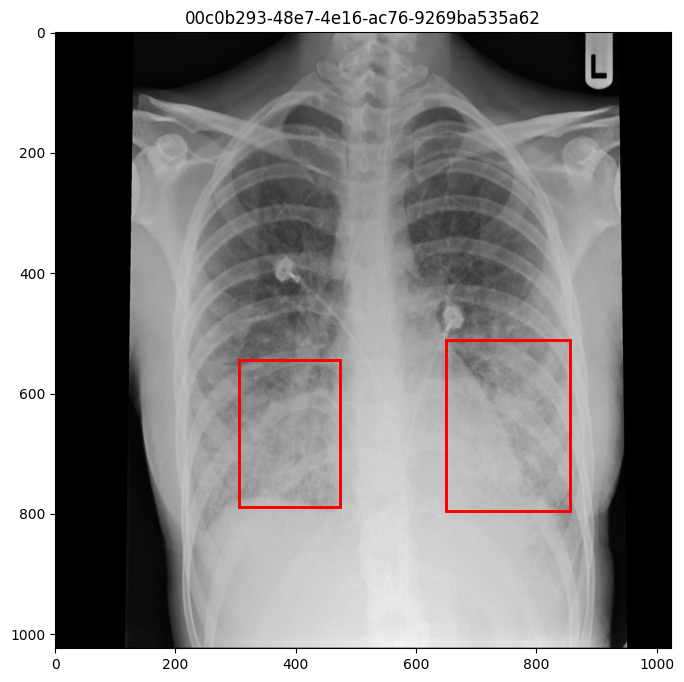

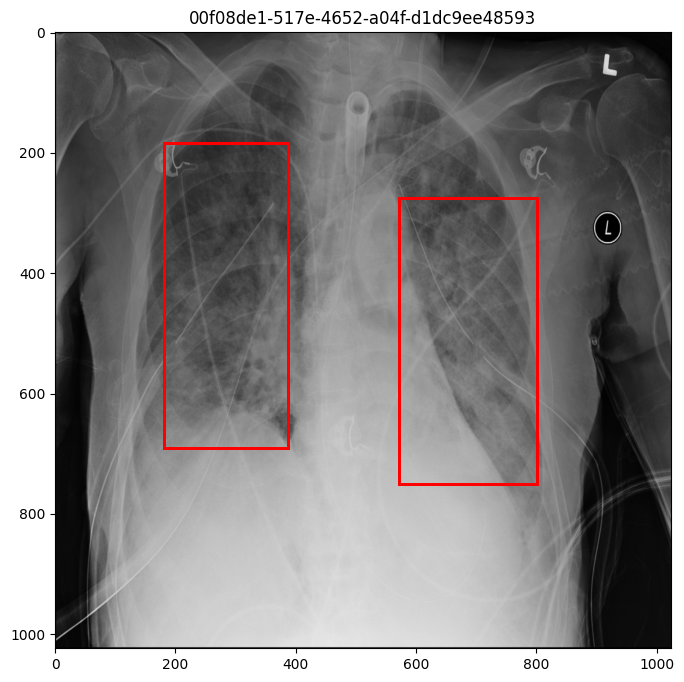

In [ ]:
pneumonia_patients = df[df['Target']==1]['patientId'].unique()
# Display 5 images with bounding boxes for pneumonia patients
for patient_id in pneumonia_patients[:5]:
    show_dicom_image(patient_id, bbox=True)

In [ ]:
!pip install -q pydicom tensorflow-addons

ERROR: Could not find a version that satisfies the requirement tensorflow-addons (from versions: none)
ERROR: No matching distribution found for tensorflow-addons


# Task
Design, test, and train basic CNN models using the DICOM images.

## Prepare data for cnn

### Subtask:
Resize and normalize the DICOM images to a suitable format for CNN input.


**Reasoning**:
Initialize lists to store processed images and labels and then iterate through the DICOM files, read, resize, and normalize the images, and append them along with their labels to the lists. Finally, convert the lists to NumPy arrays.



## Split data

### Subtask:
Split the dataset into training and testing sets.


**Reasoning**:
Split the processed image data and labels into training and testing sets and print their shapes.



## Design cnn model

### Subtask:
Define the architecture of a basic CNN model for image classification.


**Reasoning**:
Define the architecture of a basic CNN model using sequential API with convolutional, pooling, flatten, and dense layers.



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the input shape based on the processed image size
IMG_SIZE = 128 # Define IMG_SIZE here
input_shape = (IMG_SIZE, IMG_SIZE, 1) # Assuming grayscale images, add a channel dimension

# Initialize the sequential model
model = Sequential()

# Add Convolutional layers
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output
model.add(Flatten())

# Add Dense layers
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # Output layer for binary classification

# Print the model summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,193 (12.60 MB)

 Trainable params: 3,304,193 (12.60 MB)

 Non-trainable params: 0 (0.00 B)

## Compile cnn model

### Subtask:
Compile the CNN model with an appropriate optimizer, loss function, and metrics.


**Reasoning**:
Compile the defined CNN model for binary classification with an appropriate optimizer, loss function, and metrics.



In [ ]:
# Compile the model
model.compile(optimizer='adam',  # Use the Adam optimizer
              loss='binary_crossentropy',  # Binary crossentropy for binary classification
              metrics=['accuracy'])  # Evaluate using accuracy

# The model is now compiled and ready for training
print("Model compiled successfully.")

Model compiled successfully.


## Train cnn model

### Subtask:
Train the compiled CNN model using the training data.


**Reasoning**:
Train the compiled CNN model using the training data, specifying the number of epochs and a validation split, and store the training history.



# Task
Convert DICOM images to JPEG format for faster processing, then design, train, and test a basic CNN model using the converted JPEG images.

## Convert dicom to jpeg

### Subtask:
Create a new directory to store the converted JPEG images and write a script to read the DICOM files and save their pixel data as JPEG files in the new directory.


**Reasoning**:
Create a new directory for JPEG images and iterate through the DICOM files to read, convert to JPEG, and save them in the new directory.



In [ ]:
!pip install pydicom

In [ ]:
# Define target image size (should be the same as before)
IMG_SIZE = 128

# Initialize lists to store processed images and labels
processed_images_jpeg = []
image_labels_jpeg = []

# Define the directory containing the JPEG images
jpeg_image_dir_path = '/content/drive/MyDrive/Capstone Project/jpeg_images'

# Get the list of JPEG files in the directory
jpeg_files = [f for f in os.listdir(jpeg_image_dir_path) if f.lower().endswith('.jpeg')]

# Create a dictionary mapping patientId to Target for quick lookup (reusing the one created from the original df)
# Ensure 'df' is available in the environment, if not, reload it or make sure it's not cleared
if 'df' not in locals():
    print("DataFrame 'df' not found. Please ensure the DataFrame with labels is loaded.")

patient_id_to_target = df.set_index('patientId')['Target'].to_dict()


# Iterate through the list of JPEG files
for jpeg_file in jpeg_files:
    # Extract patientId from the filename (remove .jpeg extension)
    patient_id = os.path.splitext(jpeg_file)[0]

    # Construct the full path to the JPEG file
    jpeg_path = os.path.join(jpeg_image_dir_path, jpeg_file)

    try:
        # Read the JPEG image (cv2.imread reads in BGR format by default)
        image_array = cv2.imread(jpeg_path, cv2.IMREAD_GRAYSCALE) # Read as grayscale

        # Check if image reading was successful
        if image_array is None:
            print(f"Error reading JPEG file: {jpeg_file}")
            continue

        # Resize the image
        resized_image = cv2.resize(image_array, (IMG_SIZE, IMG_SIZE))

        # Normalize the pixel values to a range between 0 and 1
        # Ensure we handle potential division by zero if an image is completely black
        max_pixel_value = np.max(resized_image)
        if max_pixel_value > 0:
            normalized_image = resized_image.astype(np.float32) / max_pixel_value
        else:
            normalized_image = resized_image.astype(np.float32) # Image is black, normalization not needed

        # Get the corresponding label (0 or 1)
        # Use .get() with a default value (e.g., 0) for patientIds not in the labels df
        label = patient_id_to_target.get(patient_id, 0)


        # Append the processed image and label to the lists
        processed_images_jpeg.append(normalized_image)
        image_labels_jpeg.append(label)

    except Exception as e:
        print(f"Error processing JPEG file {jpeg_file}: {e}")

# Convert the lists to NumPy arrays
processed_images_jpeg = np.array(processed_images_jpeg)
image_labels_jpeg = np.array(image_labels_jpeg)

print(f"Processed {len(processed_images_jpeg)} JPEG images.")
print(f"Shape of processed images array: {processed_images_jpeg.shape}")
print(f"Shape of image labels array: {image_labels_jpeg.shape}")

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train_jpeg, X_test_jpeg, y_train_jpeg, y_test_jpeg = train_test_split(
    processed_images_jpeg,
    image_labels_jpeg,
    test_size=0.2,  # 20% for testing
    random_state=42  # for reproducibility
)

# Print the shapes of the resulting sets
print(f"Shape of X_train_jpeg: {X_train_jpeg.shape}")
print(f"Shape of X_test_jpeg: {X_test_jpeg.shape}")
print(f"Shape of y_train_jpeg: {y_train_jpeg.shape}")
print(f"Shape of y_test_jpeg: {y_test_jpeg.shape}")

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the input shape based on the processed image size (assuming grayscale)
input_shape = (IMG_SIZE, IMG_SIZE, 1)

# Initialize the sequential model
model = Sequential()

# Add Convolutional layers
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output
model.add(Flatten())

# Add Dense layers
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # Output layer for binary classification

# Print the model summary
model.summary()

In [ ]:
# Compile the model
model.compile(optimizer='adam',  # Use the Adam optimizer
              loss='binary_crossentropy',  # Binary crossentropy for binary classification
              metrics=['accuracy'])  # Evaluate using accuracy

# The model is now compiled and ready for training
print("Model compiled successfully.")

In [ ]:
# Train the model
history = model.fit(
    X_train_jpeg,
    y_train_jpeg,
    epochs=10,  # You can adjust the number of epochs
    batch_size=32, # You can adjust the batch size
    validation_split=0.2  # Use 20% of the training data for validation
)

print("Model training finished.")

In [ ]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_jpeg, y_test_jpeg, verbose=0)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Summary of Model Performance:

Test Loss: The loss on the test set is approximately 0.5598.
Test Accuracy: The accuracy on the test set is approximately 0.8018.
This indicates that the model can classify whether pneumonia is present or not with around 80% accuracy on unseen data.

Next step is to focus on improving the model's performance through techniques like fine-tuning and transfer learning, and also introduces object detection to identify the location of lung opacities using techniques like RCNN.

# Task
Design, train, and test basic CNN models, fine-tune them, apply transfer learning, and design, train, and test R-CNN and its hybrids for object detection using the JPEG images in the "JPEG" folder. Pickle the final model and generate a final report.

## Fine tune the trained basic cnn models for classification

### Subtask:
Improve the performance of the basic CNN model by adjusting hyperparameters or using other fine-tuning techniques.


**Reasoning**:
Evaluate the currently trained model to establish a baseline and then start iterating on hyperparameter tuning by adding dropout layers and training with a different number of epochs and batch size.



In [ ]:
# Evaluate the initial model
loss, accuracy = model.evaluate(X_test_jpeg, y_test_jpeg, verbose=0)
print(f"Baseline Test Loss: {loss:.4f}")
print(f"Baseline Test Accuracy: {accuracy:.4f}")

# --- Hyperparameter Tuning Experiment 1: Add Dropout and change epochs/batch size ---

# Define the input shape based on the processed image size (assuming grayscale)
input_shape = (IMG_SIZE, IMG_SIZE, 1)

# Initialize the sequential model
model_tuned1 = Sequential()

# Add Convolutional layers
model_tuned1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model_tuned1.add(MaxPooling2D(pool_size=(2, 2)))

model_tuned1.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_tuned1.add(MaxPooling2D(pool_size=(2, 2)))

model_tuned1.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model_tuned1.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output
model_tuned1.add(Flatten())

# Add Dense layers with Dropout
model_tuned1.add(Dense(128, activation='relu'))
model_tuned1.add(Dropout(0.5)) # Add dropout layer
model_tuned1.add(Dense(1, activation='sigmoid')) # Output layer for binary classification

# Compile the model
model_tuned1.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

print("\nModel tuned 1 compiled. Summary:")
model_tuned1.summary()

# Train the tuned model
print("\nTraining Tuned Model 1...")
history_tuned1 = model_tuned1.fit(
    X_train_jpeg,
    y_train_jpeg,
    epochs=15,  # Increased epochs
    batch_size=64, # Increased batch size
    validation_split=0.2  # Use 20% of the training data for validation
)

# Evaluate the tuned model
loss_tuned1, accuracy_tuned1 = model_tuned1.evaluate(X_test_jpeg, y_test_jpeg, verbose=0)
print(f"\nTuned Model 1 Test Loss: {loss_tuned1:.4f}")
print(f"Tuned Model 1 Test Accuracy: {accuracy_tuned1:.4f}")

In [1]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the VGG16 model pre-trained on ImageNet data, excluding the top classification layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3)) # VGG16 expects 3 channels

# Freeze the layers of the base model so they are not trained
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of the base model
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x) # Output layer for binary classification

# Create the new model
model_transfer = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model_transfer.compile(optimizer=Adam(learning_rate=0.001),
                       loss='binary_crossentropy',
                       metrics=['accuracy'])

print("Transfer Learning Model (VGG16) compiled. Summary:")
model_transfer.summary()

NameError: name 'IMG_SIZE' is not defined

In [ ]:
# Repeat the grayscale channel 3 times to match VGG16 input shape (IMG_SIZE, IMG_SIZE, 3)
X_train_jpeg_rgb = np.repeat(X_train_jpeg[..., np.newaxis], 3, axis=-1)
X_test_jpeg_rgb = np.repeat(X_test_jpeg[..., np.newaxis], 3, axis=-1)


print(f"Shape of X_train_jpeg_rgb: {X_train_jpeg_rgb.shape}")
print(f"Shape of X_test_jpeg_rgb: {X_test_jpeg_rgb.shape}")

# Train the transfer learning model
history_transfer = model_transfer.fit(
    X_train_jpeg_rgb,
    y_train_jpeg,
    epochs=10,  # You can adjust the number of epochs
    batch_size=32, # You can adjust the batch size
    validation_split=0.2  # Use 20% of the training data for validation
)

print("Transfer Learning Model training finished.")